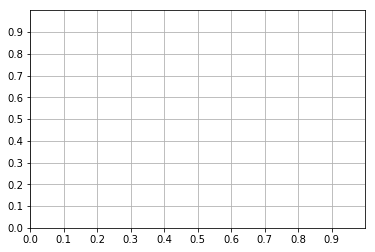

In [84]:
import numpy
x = numpy.arange(0, 1, 0.05)
y = numpy.power(x, 2)

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(numpy.arange(0, 1, 0.1))
ax.set_yticks(numpy.arange(0, 1., 0.1))
# plt.scatter(x, y)
plt.grid()
plt.show()


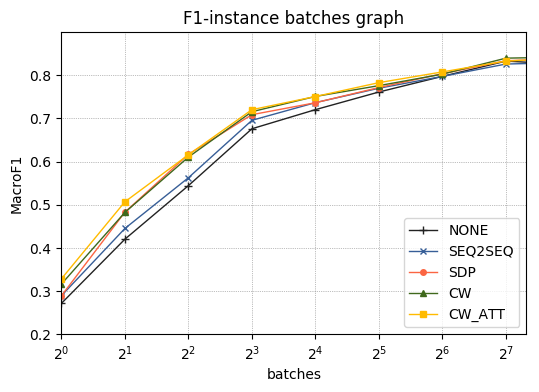

In [107]:
## import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

colors = [
    '#222222', '#375E97', '#FB6542', '#3F681C','#FFBB00', 
    '#B7B8B6', '#4CB5F5', '#B3C100', '#34675C',
    'red', 'green', 'blue', 'olive', 'purple', 'cyan', 'grey', 'pink', 'brown'
]
markers = ['+', 'x', 'o', '^', 's', 'p', '*', '1', '2', '4', '<', '>']

def get_f_vals(f_log):
    f = open(f_log)
    return f.readline().split(',')[:-1]

def F1(data):
    F1s = []
    batches = []
    batch = 1
    
    for val in data:
        F1s.append(val)
        batches.append(batch)
        batch *= 2
        
    return F1s, batches

def get_graph_data(targets):
    res = []
    for target in targets:
        res.append(F1(get_f_vals('./old_results_sem_eval/' + target + '/F_vals')))
    return res
labels = ['SEQ2SEQ', 'SDP', 'CW', 'CW_ATT']
def show_plots(targets):
    plt.clf()
    
    f00, b00 = get_graph_data(['../old_results_sem_eval/without_pre_train'])[0]
    fig = plt.figure(dpi=100)
    ax = fig.gca()
#     ax.grid(color='r', linestyle='-.', linewidth=2)
    ax.set_xticks([1, 2, 4, 8])
    ax.set_yticks(np.arange(0.2, 0.9, 0.1))

    plt.xscale('log', basex=2)
    plt.plot(b00, f00, lw=1, color=colors[0], marker='+', label='NONE')

    for i, (f, b) in enumerate(get_graph_data(targets)):
        plt.plot(b, f, lw=1, color=colors[i+1], marker=markers[i+1], markersize=4, label=labels[i])
        
    plt.xlabel('batches')
    plt.ylabel('MacroF1')
    plt.ylim([0.2, 0.9])
    plt.xlim([0, 160])
    plt.title('F1-instance batches graph')
    plt.grid(color='grey', lw=0.5, linestyle='dotted')
    plt.legend(loc="lower right")
    
#     fig, ax = plt.subplots()
#     ax.plot([1, 2, 4, 8, 16, 32, 64, 128, 256], [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
#     ax.grid(True)
#     ax.grid(color='r', linestyle='-', linewidth=2)


    plt.show()

        
targets = [ 
    'seq2seq_adadelta_lr_000001_l2_6',
    'depsp_adagrad_lr_005_mode_0_l2_6',              # 171023
    'skipgram_adagrad_lr_005_mode_0_l2_6_neg_10_win_2',  # 171019
    'skipgram_adagrad_lr_005_mode_1_l2_6_neg_10_win_2',
]

show_plots(targets)



In [ ]:
old_targets = [ 
    'depsp_adagrad_lr_005_mode_0_l2_6',              # 171023
    'depsp_adagrad_lr_005_mode_1_l2_6'
    
    'skipgram_adagrad_lr_005_mode_0_l2_6_neg_10_win_0',  # 171022
    'skipgram_adagrad_lr_005_mode_0_l2_6_neg_10_win_4',
    'skipgram_adagrad_lr_005_mode_1_l2_6_neg_10_win_1',
    'skipgram_adagrad_lr_005_mode_1_l2_6_neg_10_win_4',
    'skipgram_adagrad_lr_005_mode_2_l2_6_neg_10_win_4',

    'seq2seq_adadelta_lr_001_l2_5',              # 171021
    'seq2seq_adadelta_lr_0005_l2_6',
    'seq2seq_adadelta_lr_0001_l2_6',
    'seq2seq_adadelta_lr_00001_l2_6',
    'seq2seq_adadelta_lr_000001_l2_6',
    
    'seq2seq_adagrad_lr_001_l2_8',              # 171021
    'seq2seq_adagrad_lr_001_l2_3',
    'seq2seq_adagrad_lr_001_l2_none',
    'seq2seq_adadelta_lr_01_l2_6',
    'seq2seq_adadelta_lr_001_l2_6',

    'seq2seq_adagrad_lr_01_l2_6',               # 171021
    'seq2seq_adagrad_lr_001_l2_6',
    'seq2seq_adagrad_lr_0001_l2_6',
    'seq2seq_adagrad_lr_005_l2_8',
    'seq2seq_adadelta_lr_1_l2_6',

    'skipgram_adagrad_lr_005_mode_0_l2_6_neg_10_win_2',  # 171019
    'skipgram_adagrad_lr_005_mode_1_l2_6_neg_10_win_2',
    'skipgram_adagrad_lr_005_mode_2_l2_6_neg_10_win_2',
    'skipgram_adagrad_lr_005_mode_3_l2_6_neg_10_win_2',
    'skipgram_adagrad_lr_005_mode_4_l2_6_neg_10_win_2',
]

In [15]:
## import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

EPOCHES = 15
colors = ['red', 'green', 'blue', 'olive', 'purple', 'cyan', 'grey', 'pink', 'brown']

def get_batch_cost(dir):
    batch = []
    cost = []
    for e in range(EPOCHES):
        log_f = open(dir + "cost_log_epoch_" + str(e)) # data_sem_eval_seq2seq/pre_trained_data_lr_005/
        while True:
            line = log_f.readline()
            if not line: break

            b, c = line.split(' ')
            batch.append(b)
            cost.append(c) 
        log_f.close()
        
    return batch, cost

def get_graph_data(targets):
    res = []
    for target in targets:
        res.append(get_batch_cost('./old_results_sem_eval/' + target + '/pre_trained_data/'))
    return res

def show_graph(targets):
    plt.clf()
    plt.figure(figsize=(10, 6))#, dpi=100)

    for i, (batch, cost) in enumerate(get_graph_data(targets)):
        plt.plot(batch, cost, color=colors[i], label=targets[i])

    plt.legend(loc="upper right")
    plt.xlabel('batch')
    plt.ylabel('cost')
    plt.ylim([0, 25]) # nyt_ds
    plt.xlim([0, len(batch1)]) # nyt_ds
    plt.title('cost graph')
    plt.show()

    
# 171021
targets = [ 
    'depsp_adagrad_lr_005_l2_6'
]
show_graph(targets)
    
    



IOError: [Errno 2] No such file or directory: './old_results_sem_eval/depsp_adagrad_lr_005_l2_6/pre_trained_data/cost_log_epoch_0'

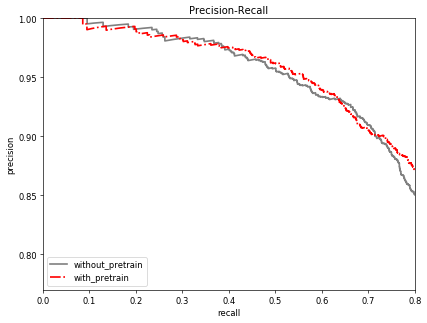

In [147]:
import matplotlib.pyplot as plt
import numpy as np

def F1(data):
    F1s = []
    batches = []
    batch = 1
    while True:
        line = data.readline()
        if not line: break
        F1s.append(float(line.strip()))
        batches.append(batch)
        batch *= 2
    return F1s, batches
        
def PR(data):
    precision = []x = numpy.arange(0, 1, 0.05)
y = numpy.power(x, 2)

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(numpy.arange(0, 1, 0.1))
ax.set_yticks(numpy.arange(0, 1., 0.1))
plt.scatter(x, y)
plt.grid()
plt.show()

    recall = []
    while True:
        line = data.readline()
        if not line: break
 
        p, r = line.split(' ')
        precision.append(p)
        recall.append(r) 
        
    return precision, recall

# 171012 Exo
result0 = open("./results_sem_eval_old/adagrad/without_pre_train/C_none_e_13_s_False_u_100_10_b_50_w_3_c_tanh_d_300_i_data_sem_eval_n_0_batches_133/test_pr_4.txt")
result1 = open("results_sem_eval/adagrad_lr_005_mode_0_l2_6_neg_30_win_2_words_update/C_none_e_13_s_False_u_100_10_b_50_w_3_c_tanh_d_300_i_data_sem_eval_n_0_pretrain_batches_133/test_pr_3.txt")

p0, r0 = PR(result0)
p1, r1 = PR(result1)
p2, r2 = PR(result2)
p3, r3 = PR(result3)

import matplotlib.pyplot as plt
import numpy as np
# Plot Precision-Recall curve
plt.clf()
plt.figure(figsize=(8, 6), dpi=60)

# 171012 Exo
plt.plot(r0, p0, lw=2, color='grey', ls='-', label='without_pretrain')
plt.plot(r1, p1, lw=2, color='red', ls='-.', label='with_pretrain')

plt.xlabel('recall')
plt.ylabel('precision')
# plt.ylim([0.8, 1.0])   # sem_eval
# plt.xlim([0.0, 0.8])
plt.ylim([0.77, 1.0]) # nyt_dsk
plt.xlim([0.0, 0.8]) # nyt_ds
plt.title('Precision-Recall')
plt.legend(loc="lower left")
plt.show()
